### Factor Analysis, Principal component Analysis and Independent Component Analysis

The factor analysis model relies on the assumption that the data vectors $\mathbf{x}^{(i)}$ have been generated as $\mathbf{W}\mathbf{z}^{(i)}+\mathbf{\varepsilon}^{(i)}$ for some subspace $\mathbf{W}$ (fixed) and Gaussian noise $\mathbf{\varepsilon}^{(i)}$


In [49]:
import numpy as np

numSamples = 200

x = np.zeros((3, numSamples))

# We start by generating points following 

W = np.random.normal(0,1, (3,2))
    

for i in range(numSamples):

    z = np.squeeze(np.random.multivariate_normal(np.zeros(2,), np.eye(2),1))

    x[:,i] = np.random.multivariate_normal(np.squeeze(np.matmul(W,z.reshape(-1,1))),1*np.eye(3),1)
    

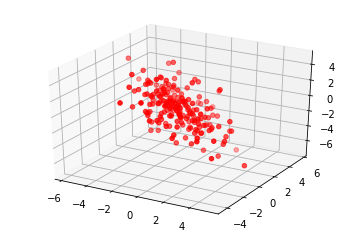

In [50]:
from mpl_toolkits.mplot3d import Axes3D  

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[0,:], x[1,:], x[2,:], c='r' )
plt.show()


[[0.65954596]
 [0.55699498]
 [0.50473331]]


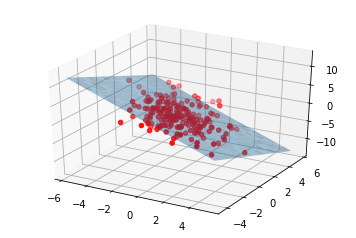

In [52]:

from scipy.linalg import null_space
beta = null_space(W.T)
print(beta)

# beta orthogonal to the columns W[:,0] W[:,1] . That is the same as 
# looking for th vector beta normal to the plane generated by the 
# vectors W[:,0] and W[:,1]
# that means the plane has equation beta0 x0 + beta1 x1 + beta2*x2 = 0
# x2 = -(beta0 x0 + beta1 x1)/beta2

plane_vector = np.true_divide([beta[0], beta[1]], -beta[2])


x0min = np.min(x[0,:])
x0max = np.max(x[0,:])
x1min = np.min(x[1,:])
x1max = np.max(x[1,:])

x0 = np.linspace(x0min, x0max,20)
x1 = np.linspace(x1min, x1max,20)

xx0, xx1 = np.meshgrid(x0,x1)

xxMat = np.hstack((xx0.reshape(-1,1), xx1.reshape(-1,1)))


plane_zvalues = np.matmul(xxMat, plane_vector)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx0, xx1, np.reshape(plane_zvalues, np.shape(xx0)), alpha=0.4)
ax.scatter(x[0,:], x[1,:], x[2,:], c='r')

plt.show()


When taking the noise to be of mean $0$ and when reducing the variance, we recover a set of points that are lying exactly on the subspace $\mathbf{W}$ 

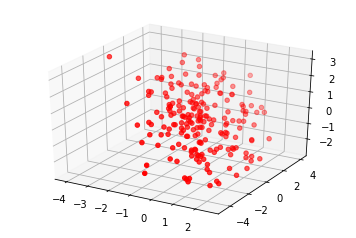

In [58]:
import numpy as np

numSamples = 200

x = np.zeros((3, numSamples))

# We start by generating points following 
W = np.random.normal(0,1, (3,2))

for i in range(numSamples):

    z = np.squeeze(np.random.multivariate_normal(np.zeros(2,), np.eye(2),1))

    x[:,i] = np.random.multivariate_normal(np.squeeze(np.matmul(W,z.reshape(-1,1))),0*np.eye(3),1)
    

from mpl_toolkits.mplot3d import Axes3D  

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[0,:], x[1,:], x[2,:], c='r' )
plt.show()


[[ 0.58463843]
 [-0.36423375]
 [ 0.72493564]]


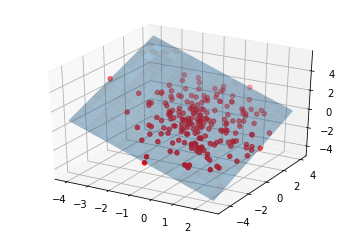

In [59]:

from scipy.linalg import null_space
beta = null_space(W.T)
print(beta)

# beta orthogonal to the columns W[:,0] W[:,1] . That is the same as 
# looking for th vector beta normal to the plane generated by the 
# vectors W[:,0] and W[:,1]
# that means the plane has equation beta0 x0 + beta1 x1 + beta2*x2 = 0
# x2 = -(beta0 x0 + beta1 x1)/beta2

plane_vector = np.true_divide([beta[0], beta[1]], -beta[2])


x0min = np.min(x[0,:])
x0max = np.max(x[0,:])
x1min = np.min(x[1,:])
x1max = np.max(x[1,:])

x0 = np.linspace(x0min, x0max,20)
x1 = np.linspace(x1min, x1max,20)

xx0, xx1 = np.meshgrid(x0,x1)

xxMat = np.hstack((xx0.reshape(-1,1), xx1.reshape(-1,1)))


plane_zvalues = np.matmul(xxMat, plane_vector)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx0, xx1, np.reshape(plane_zvalues, np.shape(xx0)), alpha=0.4)
ax.scatter(x[0,:], x[1,:], x[2,:], c='r')

plt.show()



In Principal component analysis we require the matrix $\mathbf{W}$ to have orthonormal columns, which translates the variation of the data to the $\mathbf{z}$ variables. In particular the spreading of the points along each of the directions encoded by the columns of $\mathbf{W}$ is now determined by the variance of the components $z_1$ and $z_2$ of $\mathbf{z}$. The example below illustrates this idea.

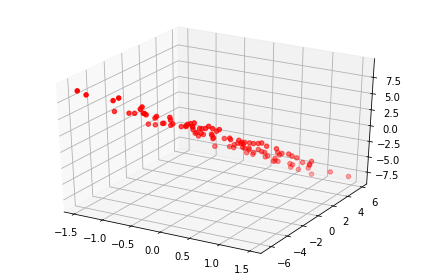

In [64]:
import numpy as np
import scipy

numSamples = 100

x = np.zeros((3, numSamples))

# Here we increase the spreading of the data along z1 vs z2
covz = np.array([[20,0],[0,0.1]])

W = np.random.normal(0,1, (3,2))
W = scipy.linalg.orth(W)
for i in range(numSamples):

    z = np.squeeze(np.random.multivariate_normal(np.zeros(2,), covz,1))

    x[:,i] = np.random.multivariate_normal(np.squeeze(np.matmul(W,z.reshape(-1,1))),.001*np.eye(3),1)
    
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[0,:], x[1,:], x[2,:], c='r')
plt.tight_layout()
plt.show()
    

[[ 0.6716363 ]
 [-0.653795  ]
 [-0.34850648]]


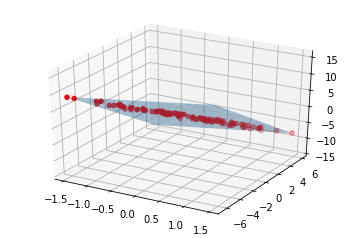

In [65]:
from scipy.linalg import null_space
beta = null_space(W.T)
print(beta)

# beta orthogonal to the columns W[:,0] W[:,1] . That is the same as 
# looking for th vector beta normal to the plane generated by the 
# vectors W[:,0] and W[:,1]
# that means the plane has equation beta0 x0 + beta1 x1 + beta2*x2 = 0
# x2 = -(beta0 x0 + beta1 x1)/beta2

plane_vector = np.true_divide([beta[0], beta[1]], -beta[2])


x0min = np.min(x[0,:])
x0max = np.max(x[0,:])
x1min = np.min(x[1,:])
x1max = np.max(x[1,:])

x0 = np.linspace(x0min, x0max,20)
x1 = np.linspace(x1min, x1max,20)

xx0, xx1 = np.meshgrid(x0,x1)

xxMat = np.hstack((xx0.reshape(-1,1), xx1.reshape(-1,1)))


plane_zvalues = np.matmul(xxMat, plane_vector)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx0, xx1, np.reshape(plane_zvalues, np.shape(xx0)), alpha=0.4)
ax.scatter(x[0,:], x[1,:], x[2,:], c='r')

plt.show()

One of the objectives in unsupervised learning is to try to understand the parameters that have an influence on the data. 

To do this, we can assume a generative model such as the Factor Analysis modelor the PCA model shown above for a fixed (unknown) subspace $\mathbf{W}$ and then try to fit that model to the data. This is equiavlent to trying to learn the lower dimensional subspace in which the latent variables 'evolve'. 

By requiring the columns of $\mathbf{W}$ to be orthonormal, PCA removes part of the ambiguity that was present in the more general Factor Analysis model. However, given the set of red points above, there are still many possible pairs of orthonormal vectors that can be used to describe the subspace (represented by the blue plane). Generally speaking, any pair of unit norm orthogonal vectors would give a valid orthonormal representation of the subspace. 

The classical PCA approach resolves that last ambiguity by returning as representation, the vectors capturing more information (i.e. more variation) first. In classical PCA, the matrix $\mathbf{W}$ recovered from the data has the form $\mathbf{W} = [w_1, \ldots w_K]$ where $\mathbf{w}_i$ are sorted according to how much variation from the point cloud they capture.    

This idea is illustrated below. We use classical PCA on a 3D point cloud (points in red) to learn the 2D subspace that best captures the variability of the points. Classical PCA can be implemented through the singular value decomposition. If we store the data vectors in the matrix $\mathbf{X}$, the singular value decomposition of $\mathbf{X}$ returns $3$ factors $\mathbf{U}$, $\mathbf{\Sigma}$ and $\mathbf{V}$ such that $\mathbf{X} = \mathbf{U}\mathbf{\Sigma}\mathbf{V}^T$ and $\mathbf{U}$ and $\mathbf{V}$ have orthonormal columns. The $K$-dimensional subspace that best approximates the data can then be obtained by truncating the matrix $\mathbf{U}$ and retaining the first $K$ columns from this matrix. Those columns then give us the set of orthonormal vectors describing the subspace (shown by the blue arrows below).


(3, 100)


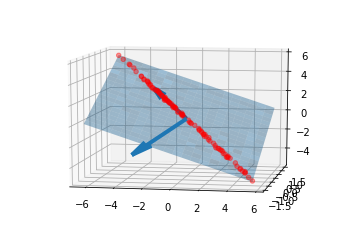

In [86]:
prototypeMatrix = x
print(np.shape(prototypeMatrix))

# in the MRI example X would be size 
# TotalnumPixels (255*255) * numImages  --> 3D representation

# exercie X is of size 3 x 100 and you want a 2D representation 

u, s, vh  = np.linalg.svd(prototypeMatrix)

# x = u[:,0]*s[0,0]*vh[0,:] + u[:,1]*s[1,1]*vh[1,:] + u[:,2]*s[2,2]*vh[2,:]

recoveredW0= u[:,0]
recoveredW1= u[:,1]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx0, xx1, np.reshape(plane_zvalues, np.shape(xx0)), alpha=0.4)

ax.quiver(0, 0, 0, recoveredW0[0], recoveredW0[1], recoveredW0[2], length=4, normalize=True,linewidths=4)
ax.quiver(0, 0, 0, recoveredW1[0], recoveredW1[1], recoveredW1[2], length=4, normalize=True,linewidths=4)
ax.scatter(x[0,:], x[1,:], x[2,:], c='r', alpha=0.4)

ax.view_init(elev=10., azim=-80)

plt.show()




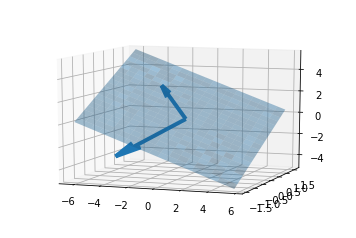

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx0, xx1, np.reshape(plane_zvalues, np.shape(xx0)), alpha=0.4)

ax.quiver(0, 0, 0, recoveredW0[0], recoveredW0[1], recoveredW0[2], length=4, normalize=True,linewidths=4)
ax.quiver(0, 0, 0, recoveredW1[0], recoveredW1[1], recoveredW1[2], length=4, normalize=True,linewidths=4)

ax.view_init(elev=10., azim=-70)

plt.show()


Once we have a characterization of the subspace, one can compute the projection of the red points onto the 2D subspace. Such a projection is useful when we want to get rid of the features that are not essential to the understanding of the data. Once we have the matrix $\mathbf{U}$, the projection of each $\mathbf{x}^{(i)}$ onto the subspace is given by 

$\mathbf{x}^{(i)} = \alpha_1^{(i)}\mathbf{u}_1 + \alpha_2^{(i)}\mathbf{u}_2$

where $\mathbf{u}_1$ and $\mathbf{u}_2$ are the columns of $\mathbf{U}$ and the coefficients $\alpha_1^{(i)}$ and $\alpha_2^{(i)}$ can be obtained from the SVD as the $i^{th}$ column of the matrix $\mathbf{\Sigma}\mathbf{V}^T$ after we retain the first $K$ ($2$ here) rows of this matrix. 

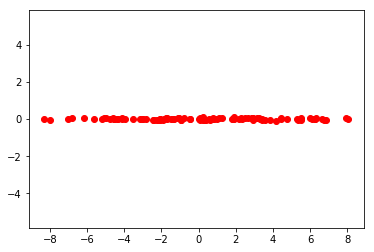

In [72]:
component1 = s[0]*vh[0,:] # each v[i,:] is size 100
component2 = s[1]*vh[1,:]

plt.scatter(component1, component2,c='r')
plt.axis('equal')
plt.show()


In [73]:
print(s)

[38.46976736  0.42583685  0.33655995]
